In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact, IntSlider

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam

from keras.datasets import mnist

from keras.utils import to_categoricalegorical

In [5]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [6]:
print('共 %d 訓練資料，每筆資料的尺寸為 %d x %d' %x_train0.shape)

共 60000 訓練資料，每筆資料的尺寸為 28 x 28


In [8]:
x_train = x_train0.reshape((60000, 28*28))
x_test = x_test0.reshape((10000, 28*28))

In [9]:
x_train -= x_train.min()
x_train = x_train/x_train.max()

In [10]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [11]:
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [13]:
y_train_num = to_categorical(y_train0, 10)
y_test_num = to_categorical(y_test0, 10)

In [14]:
y_train_eo = np.ones_like(y_train0)

In [15]:
y_train_eo[y_train0 % 2 ==0] = 0

In [16]:
y_test_eo = np.ones_like(y_test0)
y_test_eo[y_test0 % 2 ==0] = 0

784 -> fc_500 -> fc_500 -> fc_10

In [18]:
model = Sequential()

model.add(Dense(500, input_dim= 28*28))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
first_layer = [Dense(500, input_dim= 28*28), Activation('sigmoid')]
second_layer = [Dense(500), Activation('sigmoid')]
last_layer = [Dense(10), Activation('softmax')]

In [21]:
model1 = Sequential(first_layer + second_layer + last_layer)

In [22]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
all_except_last_layer = [Dense(500, input_dim= 28*28), Activation('sigmoid'),Dense(500), Activation('sigmoid')]
last_layer = [Dense(10), Activation('softmax')]

In [24]:
model_num = Sequential(all_except_last_layer+last_layer)
model_num.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_num.compile(optimizer=SGD(lr=0.09), loss='categorical_crossentropy', metrics=['acc'])

In [35]:
model_num.fit(x_train, y_train_num, batch_size = 100, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 1.5022 - acc: 0.5303
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.5372 - acc: 0.8496
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.4047 - acc: 0.8842
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3601 - acc: 0.8962
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3359 - acc: 0.9028
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3195 - acc: 0.9067
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3077 - acc: 0.9107
Epoch 8/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2978 - acc: 0.9132
Epoch 9/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2891 - acc: 0.9150
Epoch 10/20
60000/60000 [===========================

In [36]:
score = model_num.evaluate(x_train, y_train_num, batch_size=1000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 1s 25us/step
Loss: 0.213973
準確率: 93.786666


In [37]:
last_layer_eo = [Dense(2), Activation('softmax')]

In [38]:
model_eo = Sequential(all_except_last_layer+last_layer_eo)
model_eo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1002      
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
Total params: 644,002
Trainable params: 644,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_eo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ['acc'])

In [40]:
y_train_eo = to_categorical(y_train_eo, 2)

In [43]:
y_test_eo = to_categorical(y_test_eo, 2)

In [41]:
score = model_eo.evaluate(x_train, y_train_eo, batch_size=10000)

60000/60000 [==============================] - 1s 22us/step


In [42]:
score

[0.81995251774787903, 0.49153332908948261]

In [44]:
model_eo.fit(x_train, y_train_eo)

Epoch 1/1
60000/60000 [==============================] - 14s 238us/step - loss: 0.3198 - acc: 0.8669


In [45]:
model_num.evaluate(x_train, y_train_num)

60000/60000 [==============================] - 5s 81us/step


[0.21617420039077601, 0.93766666666666665]

In [47]:
all_except_last_layer[0].trainable = False

In [48]:
for layer in all_except_last_layer:
    layer.trainable = False

In [49]:
model_eo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics = ['acc'])
model_eo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_9 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 1002      
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
Total params: 644,002
Trainable params: 1,002
Non-trainable params: 643,000
_________________________________________________________________


In [50]:
from keras.models import Model
from keras.layers import Input

[Dense(50), Activation('sigmoid')] 等價於

[Dense(50, activation('sigmoid'))]

In [51]:
x = Input(shape = (784,))

In [56]:
f_1 = Dense(500, activation='sigmoid') #784 ->500
f_2 = Dense(500, activation='sigmoid') #500 ->500
f_3 = Dense(10, activation='softmax') #500 -> 10

In [57]:
h_1 = f_1(x)

In [58]:
print(x)

Tensor("input_1:0", shape=(?, 784), dtype=float32)


In [59]:
print(h_1)

Tensor("dense_17/Sigmoid:0", shape=(?, 500), dtype=float32)


In [60]:
print(f_1)

In [61]:
h_2 = f_2(h_1)

In [63]:
y = f_3(h_2)

In [64]:
model = Model(x, y)

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [68]:
from keras.layers import concatenate, add

In [69]:
f_3 = Dense(10, activation='softmax')
f_4 = Dense(500, activation='relu')

z = f_4(h_1)

In [71]:
u = concatenate([h_2, z])

In [72]:
y = f_3(u)

In [73]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 500)          250500      dense_17[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 500)          250500      dense_17[0][0]                   
__________________________________________________________________________________________________
concatenat

In [74]:
from keras.layers import Lambda

In [75]:
from keras import backend as K

In [76]:
K.mean

<function keras.backend.tensorflow_backend.mean>

In [77]:
test_array = np.arange(12).reshape(1, 2, 6)
print(test_array)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]]


In [78]:
K.mean(x)

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [86]:
keras_mean = Lambda(K.mean, output_shape=(1,))

In [87]:
keras_mean

In [88]:
keras_mean(x)

<tf.Tensor 'lambda_2/Mean:0' shape=() dtype=float32>

In [89]:
model = Model(x, keras_mean(x))

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [91]:
x_train[:1].shape

(1, 784)

In [92]:
model.predict(x_train[:1])

array([ 0.13768007], dtype=float32)

In [93]:
x_train[:1].mean()

0.13768007202881152

In [94]:
sampling_dim = 2

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(sampling_dim,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [95]:
sample_layer = Lambda(sampling, output_shape=(sampling_dim,))

In [96]:
m = Input(shape=(sampling_dim,))
log_s = Input(shape=(sampling_dim,))

In [98]:
y = sample_layer([m, log_s])

In [100]:
sampling_model = Model([m, log_s], y)

In [101]:
sampling_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 2)            0           input_2[0][0]                    
                                                                 input_3[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [102]:
sampling_model.predict([[[4., 2.]],[[0., 0.]]])

array([[ 4.44665813,  0.57568645]], dtype=float32)

In [109]:
np_sample = np.random.multivariate_normal([4, 2], np.identity(2), size=100)

In [106]:
keras_sampling = np.zeros((100, 2))
for i in range(100):
    keras_sampling[i] = sampling_model.predict([[[4., 2.]],[[0., 0.]]])

In [107]:
keras_sampling

array([[ 3.42518568,  3.78667641],
       [ 3.86775255,  0.9968003 ],
       [ 6.14583158,  2.83526802],
       [ 4.8268404 ,  0.9664216 ],
       [ 3.80578971,  2.18026114],
       [ 3.1286242 ,  2.84195566],
       [ 5.62234163,  2.42769504],
       [ 3.21589494,  2.02323246],
       [ 5.90277576,  1.17915702],
       [ 4.00495148,  1.49718034],
       [ 3.23117542,  1.5625    ],
       [ 4.38411617,  2.03011179],
       [ 3.72424078,  1.83064461],
       [ 3.54414248,  2.19215465],
       [ 4.4393878 ,  1.46542132],
       [ 5.04032803,  4.02854729],
       [ 5.65306616,  1.21210408],
       [ 3.92954969,  2.38920259],
       [ 2.27826667,  2.2242558 ],
       [ 5.14550829,  3.90575504],
       [ 4.87170601,  2.21344471],
       [ 3.04398584,  2.75424457],
       [ 3.48972511,  1.9742502 ],
       [ 4.0257678 ,  3.1049428 ],
       [ 5.05736542,  0.67564189],
       [ 3.6056304 ,  0.92236686],
       [ 4.00933981,  1.68806052],
       [ 4.73408079,  3.68191624],
       [ 3.45707417,

Text(0.5,1,'Normal Random Samples using Keras/Numpy')

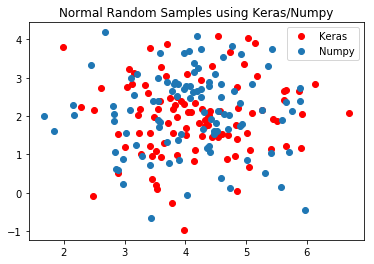

In [110]:
plt.plot(keras_sampling[:, 0], keras_sampling[:, 1], 'ro')
plt.plot(np_sample[:, 0], np_sample[:, 1], 'o')
plt.legend(['Keras', 'Numpy'])
plt.title('Normal Random Samples using Keras/Numpy')